## Questão 1

Considere o problema de análise de componentes principais (PCA), isto é, determinar em uma distribuição de dados as componentes que tenham associadas a elas a maior variância e representar as mesmas no espaço de dados formado pelos autovetores da matriz de correlação. Neste sentido considere o seguinte problema. A tabela abaixo apresenta os dados relativos a amostras de solo. Para cada amostra, tem-se as medidas das porcentagens de areia ($X_1$), sedimentos ($X_2$), argila ($X_3$) e a quantidade de material orgânico ($X_4$). Da referida tabela obtenha as estatísticas descritivas de cada variável, isto é, a média, a mediana, o desvio padrão, os valores máximo e mínimo. Sob estas condições: 

1) Obtenha desta tabela a matriz de correlação.

2) Desta matriz determine os autovalores ordenados do máximo ao mínimo e os autovetores correspondentes.

3) Apresente as equações das componentes principais, isto é, cada componente é dada por:

$$Y_i = \textbf{e}^t_{i}X_{i} = e_{1i}X_1 + e_{2i}X_2 + e_{3i}X_3 + e_{4i}X_4$$

Onde, $i = 1, 2, 3, 4$ e $e_{ji}$ é a componente $i$ do autovetor $j$

4) Calcule os percentuais de variância para cada componente e ordene a classificação das variáveis segundo este critério.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/amostras_de_solo.csv')
data.drop(columns=['Amostra'], inplace=True)
data.head()

,Areia_X1,Sedimentos_X2,Argila_X3,MatOrg_X4
0,79.9,13.9,6.2,3.3
1,78.5,16.3,7.2,2.5
2,68.9,22.6,8.5,3.6
3,62.2,20.2,17.6,2.8
4,69.2,23.7,7.1,0.9


In [31]:
# Cálculo da Matriz de Covariância
from sklearn.preprocessing import StandardScaler

zscore = StandardScaler()
data_norm = zscore.fit_transform(data)

cov_matrix = np.cov(data_norm, rowvar=False)
cov_matrix

array([[ 1.04347826, -0.97842255, -0.74945982,  0.27437477],
       [-0.97842255,  1.04347826,  0.45444418, -0.36195256],
       [-0.74945982,  0.45444418,  1.04347826, -0.00542347],
       [ 0.27437477, -0.36195256, -0.00542347,  1.04347826]])

In [35]:
# Cálculo dos autovalores e autovetores
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

print(f'Autovalores: {eig_vals}')
print(f'Autovetores: \n{eig_vecs}')

# Ordenando
idx = np.argsort(eig_vals)[::-1]

eig_vals_sorted = eig_vals[idx]
eig_vecs_sorted = eig_vecs[:, idx]

print(f'\nAutovalores Ordenados: {eig_vals_sorted}')
print(f'Autovetores Ordenados: \n{eig_vecs_sorted}')

Autovalores: [2.61656722e+00 1.34814536e-03 4.93324575e-01 1.06267310e+00]
Autovetores: 
[[ 0.62402814 -0.75665141 -0.17109737 -0.09377215]
 [-0.57858996 -0.58679026  0.55273948 -0.12405612]
 [-0.46528956 -0.2883032  -0.68530201  0.48036241]
 [ 0.24357375 -0.00609116  0.44222834  0.86317369]]

Autovalores Ordenados: [2.61656722e+00 1.06267310e+00 4.93324575e-01 1.34814536e-03]
Autovetores Ordenados: 
[[ 0.62402814 -0.09377215 -0.17109737 -0.75665141]
 [-0.57858996 -0.12405612  0.55273948 -0.58679026]
 [-0.46528956  0.48036241 -0.68530201 -0.2883032 ]
 [ 0.24357375  0.86317369  0.44222834 -0.00609116]]


In [43]:
# Percentuais de variãncia para cada componente
for i, eig_val in enumerate(eig_vals_sorted):
    print(f'X_{i+1}: {eig_val/eig_vals_sorted.sum()*100:.2f}%')

X_1: 62.69%
X_2: 25.46%
X_3: 11.82%
X_4: 0.03%


# Visualização

[]

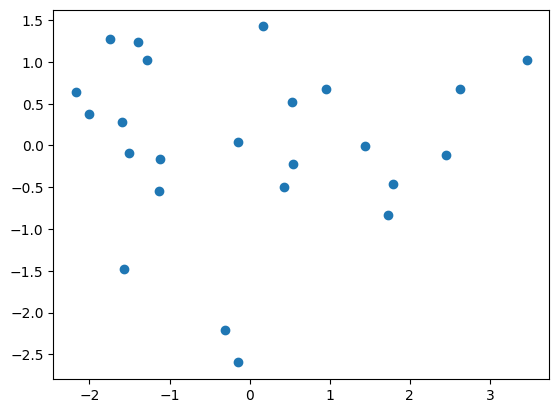

In [57]:
# Projetando os dados nos componentes principais
k = 2
W = eig_vecs_sorted[:, :k]

X_pca = data_norm.dot(W)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.plot()